import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

## K-NN(K En Yakın Komşu)
* Parametrik olmayan bir öğrenme türüdür.
* En yakın olan komşularına göre bağımlı değişken türü ortaya çıkartılır 

### KNN Basamakları:
1. Komşu sayısını belirle (K)
2. Bilinmeyen n tane nokta ile, diğer tüm noktalar arasındaki uzaklıkları hesapla 
3. Uzaklıkları sırala ve belirenen k sayısına göre en yakın olan k gözlemi seç
4. Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver. 

In [42]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [43]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [45]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [46]:
df.isnull().sum().sum()

59

In [47]:
df = df.dropna()

In [48]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [49]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [50]:
knn_model

KNeighborsRegressor()

In [51]:
knn_model.n_neighbors

5

### Tahmin

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [13]:
# Farklı k(komşu) değerleri için hata kareler ortalaması(TEST HATASI) ne olur ona bakalım. 

In [14]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k=",k, "için rmse değeri:", rmse)

k= 1 için rmse değeri: 0.0
k= 2 için rmse değeri: 179.52761335480352
k= 3 için rmse değeri: 205.20157172291863
k= 4 için rmse değeri: 220.5139794876305
k= 5 için rmse değeri: 239.64671325413764
k= 6 için rmse değeri: 243.5904190007242
k= 7 için rmse değeri: 258.1478781634636
k= 8 için rmse değeri: 266.05374203349805
k= 9 için rmse değeri: 269.73782093553376
k= 10 için rmse değeri: 271.2798300436963


### Model Tuning
* Hangi k değeri en uygun ve optimize sonuç verir bunu cv yöntemi ile tespit ederiz.

* <font color="orange"> GridSearch metodu, olası tüm parametrelerin belirli kombinasyonlarla denenip cv uygulanarak
* en uygun sonucun bulunmasını sağlayan bir yöntemdir. Bundan sonra süreli uygulayacağız

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [17]:
knn = KNeighborsRegressor()

In [18]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [19]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
knn_cv_model.best_params_["n_neighbors"]

8

* Biz küçük olan rmse değerinden çok; valide edilmiş ve en uygun değeri arıyoruz.
* Üstte amele usülü yaptığımız yerde train seti üzerinden direkt incelemeler yaptık ama burada değerleri valide ettikten
  sonra en uygun değeri bulmaya çalıştık. Bu nedenle bu yaptığımız doğrulanmış değerdir. 

In [21]:
best_params = knn_cv_model.best_params_["n_neighbors"]

In [22]:
knn_tuned = KNeighborsRegressor(n_neighbors= best_params)

In [23]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [24]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

413.7094731463598

## Destek Vektör Regresyonu (SVR)
* Amaç bir marjin aralığında maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir.
* <font color="red"> Aykırı değerlerle ve aykırılıklara daha az duyarlı olan, onlarla mücadele edebilen algoritamalara
    <u>robust(dayanıklı)</u> algoritmalar denir ve SVR da bir robust algoritmadır </font>

In [24]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [25]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [26]:
from sklearn.svm import SVR

In [27]:
svr_model = SVR("linear").fit(X_train,y_train)

In [28]:
svr_model.predict(X_train)[0:4]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659])

In [29]:
print(f"y = {svr_model.intercept_[0]} + {svr_model.coef_[0][0]} x")


y = -48.69756097561513 + 4.969512195122093 x


In [30]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [31]:
-48.69756097561513 + 4.969512195122093*91
# yukardaki ilk değer için verilen tahmin değeri ile aynı
# denklemi checksum yaptık 

403.5280487804953

In [32]:
y_pred = svr_model.predict(X_train)

In [33]:
y_pred[0:3]

array([403.52804878, 666.91219512, 706.66829268])

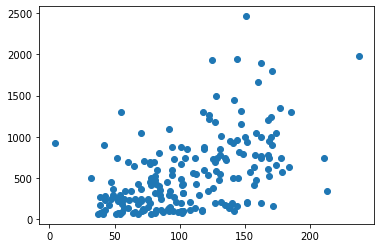

In [34]:
plt.scatter(X_train,y_train)

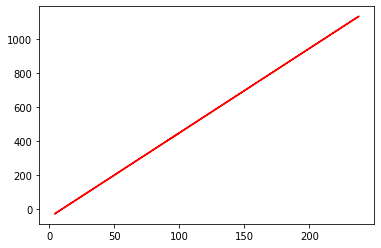

In [35]:
plt.plot(X_train,y_pred,color="r");

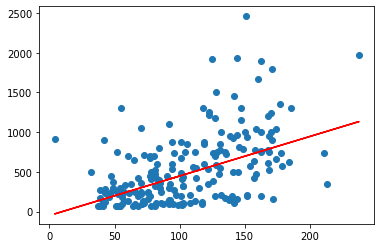

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color="r");

In [38]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train,y_train)
lm_pred = lm_model.predict(X_train)
print(f"{lm_model.intercept_} + {lm_model.coef_[0]} x")

-8.814095480334572 + 5.1724561354706875 x


In [39]:
lm_pred[0:3]
# svr da ilk değer için tahmini 403 bulmuştuk burada 461 peki bu büyük farkın nedeni acaba ne??

array([461.87941285, 736.01958803, 777.39923711])

Text(0, 0.5, 'Maaş(salary)')

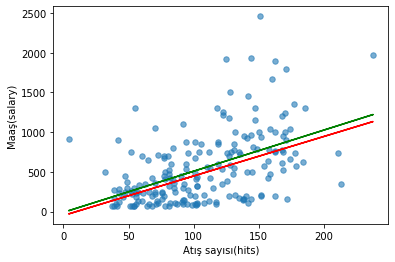

In [40]:
plt.scatter(X_train,y_train, alpha=0.6, s=30)
plt.plot(X_train, lm_pred, "g")
plt.plot(X_train,y_pred, color ="r")

plt.xlabel("Atış sayısı(hits)")
plt.ylabel("Maaş(salary)")

* Bunun nedeni, svr'ın robust bir algoritma olması. yani outlier değerlerden çok daha az etkilenmesi
* lineer model ise ekk'dan dolayı en üstteki outlier değerlerden bile fazlasıyla etkileniyor ve daha yukarı kayıyor 
* bu da hesaplama yaparken aykırı gözlemlerden çok daha fazla etkilenmesine neden oluyor.

### Tahmin

In [37]:
svr_modelz

SVR(kernel='linear')

In [42]:
y_pred = svr_model.predict(X_train)

In [43]:
np.sqrt(mean_squared_error(y_train,y_pred))

389.97589200276997

### Model Tuning

In [44]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [46]:
pd.Series(svr_cv_model.best_params_)

C    0.1
dtype: float64

In [47]:
svr_tuned = SVR("linear",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [48]:
y_pred = svr_tuned.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

## Doğrusal Olmayan SVR

In [21]:
svr_rbf = SVR().fit(X_train,y_train)

### Tahmin

In [22]:
y_pred = svr_rbf.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

440.47169927311063

### Model Tuning

In [23]:
svr_rbf

SVR()

In [53]:
svr_params = {"C":[0.1,0.4,0.5,10,15,20]}
svr_rbf_model = GridSearchCV(svr_rbf,svr_params,cv=10).fit(X_train,y_train)

In [54]:
pd.Series(svr_rbf_model.best_params_)

C    20
dtype: int64

In [55]:
svr_tuned = SVR("rbf",C=pd.Series(svr_rbf_model.best_params_)[0]).fit(X_train,y_train)

In [56]:
y_pred = svr_tuned.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

467.4565061331665

# <font color="orange"> Yapay Sinir Ağları (Regresyon) </font>
*

In [58]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# bir dönüştürme işlemi uygulayarak ayrık değerlerden daha az etkilenmesni sağlamış olduk

In [62]:
from sklearn.neural_network import MLPRegressor

In [63]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)

In [64]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
mlp_model.n_layers_
# normalde giriş-gizli-çıkış katmanı var. model oluştururken 2 parametre vererek 1 katman daha ekledik ve 4 katman oluştu

4

In [66]:
mlp_model.hidden_layer_sizes
# gizli katmandaki eleman(nöron sayısı)

(100, 20)

### Tahmin

In [67]:
y_pred = mlp_model.predict(X_train_scaled)

In [68]:
np.sqrt(mean_squared_error(y_train,y_pred))

485.72278606129305

### Model Tuning

In [69]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [70]:
mlp_params = {"alpha":[0.01,0.02,0.05,0.005,0.10],
             "hidden_layer_sizes": [(100,20),(100,50,20),(300,200)],
             "activation": ["relu","logistic"]}

In [71]:
mlp_model_cv = GridSearchCV(mlp_model,mlp_params,cv=10).fit(X_train_scaled,y_train)

In [72]:
mlp_model_cv.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200)}

In [73]:
mlp_tuned = MLPRegressor(activation="relu", alpha=0.05, hidden_layer_sizes=(300,200)).fit(X_train_scaled,y_train)

In [74]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [75]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.14219680632254

# <font color="orange"> Classification and Regression Trees (CART) </font>

In [76]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [77]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [78]:
cart_model = DecisionTreeRegressor(min_samples_split=2).fit(X_train,y_train)

In [79]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [80]:
!pip install skompiler

In [81]:
from skompiler import skompile

In [82]:
!pip install astor

* Kural Seti Oluşturma ...

In [83]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666667 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.16650000000004 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((
    505.0 if x[0] <= 

### Tahmin

In [84]:
y_pred = cart_model.predict(X_train)

In [85]:
np.sqrt(mean_squared_error(y_train,y_pred))

231.67017321152872

### Model Tuning

In [86]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [87]:
cart_params = {"max_leaf_nodes": np.arange(2,10),
              "min_samples_split": np.arange(2,100)}

In [88]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [89]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [90]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76).fit(X_train,y_train)

In [91]:
y_pred = cart_tuned.predict(X_test)

In [92]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066

# <font color="orange"> Bagged Trees </font>

In [93]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

### Model

In [94]:
bag_model = BaggingRegressor(bootstrap_features=True).fit(X_train,y_train)

In [95]:
bag_model

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [97]:
bag_model.n_estimators

10

In [100]:
bag_model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=46747081, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=2084050677, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_we

In [101]:
bag_model.estimators_samples_

[array([161, 121, 113, 173, 153, 160, 168,  55, 192,  44, 101,   8,  56,
        139, 117, 184,  34,  51,  65,  21,  83,  52,  32,  36, 111, 117,
        106,  52, 155, 163, 163,   2,  75, 187, 171,  91,  17, 129,  49,
        150,  87,  73,  88,  79, 155,  63,  91,  67, 108, 104, 116,  66,
         10,  29, 174,  56,  22,  17, 112, 105, 174,  35, 152, 129, 118,
        114, 117,  58, 161, 100,  52,  68, 179, 138,  83,  59,  28, 133,
        163,  55, 195,  25,  53, 127, 118, 192,  55,  55,  12,  28, 102,
        166,  52, 148,  43,  28, 117, 176, 109, 147,  76,  51, 119, 142,
          0,  56, 153,  80,  70,  30, 193, 150,  52,  78,  42, 159, 180,
          1, 180, 181,  75,  92,  15,   3, 148,  42, 138,  67,  31, 108,
         68,  56,  55,  94, 113, 131,  73,  95,  81,  82,  59, 168,  69,
          1, 136, 173, 192,  22, 132, 132, 155, 111, 163, 134, 135, 141,
         97, 158,  50,  32, 154, 145,  16, 186,   7,   2,  10, 146, 126,
          7,   9, 114, 122, 184,   5, 138,  19, 108

In [102]:
bag_model.estimators_features_

[array([ 6,  8, 10, 18,  2,  0, 18, 16,  9,  8,  1, 14,  1,  2,  4, 11,  6,
        18,  1]),
 array([ 2, 12, 13,  9, 13, 12, 18,  8, 11,  3,  6, 16,  7,  1, 16,  6, 16,
         7, 15]),
 array([ 6, 11,  4,  8, 10, 18,  2,  4,  5,  0,  1,  5,  5,  2,  0, 12, 16,
        11, 14]),
 array([ 0,  8,  8,  3, 11,  9,  4, 10, 11,  1, 12,  2, 15, 12,  1, 18,  4,
        11, 11]),
 array([15, 12,  7,  8, 13, 10, 17,  9,  6, 18,  8,  2, 17, 14, 14,  3, 11,
        15, 15]),
 array([15,  7, 13,  4,  7,  6, 18, 12, 17, 17,  8,  1,  9,  8, 11, 18,  0,
        10,  6]),
 array([10, 13,  2,  0, 17,  4, 17,  0, 10, 18,  2, 16,  0,  7,  2, 14, 11,
         1,  4]),
 array([ 3, 15, 12, 11,  9,  7, 14,  7, 13,  4,  5,  8,  8, 15,  1, 17,  1,
        12,  0]),
 array([ 6, 11, 11, 17, 11, 13,  4, 18,  9, 11,  8,  9,  1,  0, 15,  7,  2,
        10,  2]),
 array([10,  4, 17, 17,  4, 14,  9,  0,  8, 11, 11, 12,  9,  8, 10, 17, 12,
        17,  0])]

### Tahmin

In [114]:
y_pred = bag_model.predict(X_test)

In [116]:
np.sqrt(mean_squared_error(y_test,y_pred))

348.88971637063065

In [117]:
ikinci_agac = bag_model.estimators_[8].fit(X_train,y_train)

In [118]:
ikinci_pred = ikinci_agac.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test,y_pred))

348.88971637063065

In [120]:
for i in range(10):
    agac = bag_model.estimators_[i].fit(X_train,y_train)
    agac_pred = agac.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test,y_pred)))

348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065
348.88971637063065


### Model Tuning

In [128]:
bag_model

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [130]:
bag_params = {"n_estimators": list(range(1,20))}

In [133]:
bag_cv_model = GridSearchCV(bag_model,bag_params,cv=10).fit(X_train,y_train)

In [134]:
bag_cv_model.best_params_

{'n_estimators': 5}

In [135]:
bag_tuned = BaggingRegressor(n_estimators=19,random_state=45).fit(X_train,y_train)

In [136]:
y_pred = bag_tuned.predict(X_test)

In [137]:
np.sqrt(mean_squared_error(y_test,y_pred))

332.4260086061929

# <font color="orange"> Random Forests </font>

In [138]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [139]:
from sklearn.ensemble import RandomForestRegressor

### Model Oluşturma

In [140]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [141]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

* max_features = model oluşturulurken kullanılacak max değişken sayısı
* n_estimators = bagged trees'de olduğu gibi oluşturulacak ağaç sayısı
* max_depth = ağacın derinliği

### Tahmin

In [144]:
y_pred = rf_model.predict(X_train)

In [145]:
np.sqrt(mean_squared_error(y_train,y_pred))

128.0334724775222

### Model Tuning

In [146]:
rf_params = {"max_depth":list(range(1,10)),
            "max_features": [3,5,10,15],
            "n_estimators": [100,200,500,1000]}

In [147]:
rf_model = RandomForestRegressor(random_state=42)

In [148]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10) # n_jobs = -1 de kullanılabilir

In [149]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 

In [150]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [151]:
rf_tuned = RandomForestRegressor(max_depth=8,max_features=3,n_estimators=200)

In [153]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [154]:
y_pred = rf_tuned.predict(X_test)

In [156]:
np.sqrt(mean_squared_error(y_test,y_pred))

338.5441430073436

In [157]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, 
                          index=X_train.columns)

In [158]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [159]:
Importance.head()

,Importance
AtBat,5.973941
Hits,5.765079
HmRun,3.029827
Runs,4.401672
RBI,4.796183


Text(0.5, 0, 'Değişkenlerin önem düzeyi')

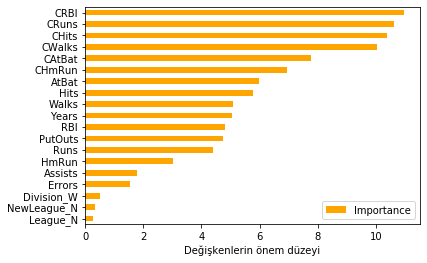

In [160]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="orange")
plt.xlabel("Değişkenlerin önem düzeyi")

# <font color = "orange"> Gradient Boosting Machines(GBM) </font>

In [10]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Tahmin

In [13]:
y_pred = gbm_model.predict(X_train)

In [14]:
np.sqrt(mean_squared_error(y_train,y_pred))

45.12752230662171

### Model Tuning

In [15]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [16]:
gbm = GradientBoostingRegressor()

In [18]:
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1, verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.6min


KeyboardInterrupt: 

In [23]:
cgbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [20]:
catb_cv_model.fit(X_train, y_train)

NameError: name 'catb_cv_model' is not defined

In [21]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

NameError: name 'CatBoostRegressor' is not defined

In [22]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

NameError: name 'catb_tuned' is not defined

In [24]:
gbm_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [25]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [26]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

319.26810180166774

In [27]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

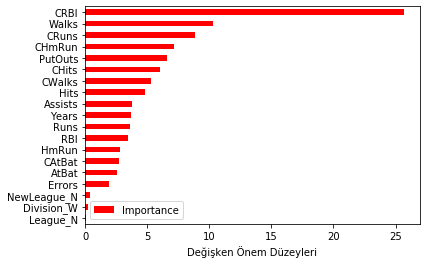

In [28]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# <font color="orange"> XGBoost </font> 

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [6]:
!pip install xgboost

In [7]:
import xgboost as xgb

In [8]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [9]:
from xgboost import XGBRegressor

In [10]:
xgb_model = XGBRegressor().fit(X_train,y_train)

### Tahmin

In [15]:
y_pred = xgb_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.4651481224188

### Model Tuning

In [17]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [19]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [20]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.4180929981069

# -*-*-*-*

In [21]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [22]:
X_train.shape

(197, 19)

In [23]:
y_train.shape

(197,)

In [24]:
X_test.shape

(66, 19)

In [25]:
y_test.shape

(66,)

In [26]:
df.shape

(263, 20)

In [27]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [30]:
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,0,0,0
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,1,0,1
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,0,1,0


In [31]:
y_train.head()

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
Name: Salary, dtype: float64

In [34]:
y_test.head()

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
Name: Salary, dtype: float64